In [1]:

import sys
import os
import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import load_json
from stardist.models import StarDist2D
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
from pathlib import Path

Using TensorFlow backend.


In [2]:
imagedir = '/home/sancere/Kepler/FinalONEATTraining/NEATTest/'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/EverydayneatmodelV2/'
savedir= '/home/sancere/Kepler/FinalONEATTraining/NEATTest/Save/'
model_name = 'divisionm4d74V2'
star_model_name = 'bin2stardist'
division_categories_json = model_dir + 'DivisionCategories.json'
catconfig = load_json(division_categories_json)
division_cord_json = model_dir + 'DivisionCord.json'
cordconfig = load_json(division_cord_json)
model = NEATDynamic(None, model_dir , model_name,catconfig, cordconfig)
starmodel = StarDist2D(config = None, name = star_model_name, basedir = model_dir)
Path(savedir).mkdir(exist_ok=True)
n_tiles = (1,1)
event_threshold = 0.9
iou_threshold = 0.6
yolo_v2 = True

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.65, nms_thresh=0.075.


# In the code block below compute the markers and make a dictionary for ach image

In [3]:
Raw_path = os.path.join(imagedir, '*tif')
X = glob.glob(Raw_path)
marker_dict = {}
for imagename in X:
     markers, markers_tree, density_location =  model.markers(imagename, starmodel, n_tiles = n_tiles)
     
     marker_dict[imagename] = [markers, markers_tree, density_location]
     

  0%|          | 0/20 [00:00<?, ?it/s]

Obtaining Markers



 50%|█████     | 10/20 [00:00<00:00, 94.39it/s]

Creating Dictionary of marker location for fast search


 25%|██▌       | 5/20 [00:00<00:00, 41.11it/s]

Computing density of each marker


100%|██████████| 20/20 [00:00<00:00, 37.95it/s]


# In the cell below use the computed dictionary and apply division model detection

In [4]:
for imagename in X:
     
     markers, markers_tree, density_location = marker_dict[imagename]
     model.predict(imagename,markers, markers_tree, density_location, savedir, n_tiles = n_tiles, event_threshold = event_threshold, iou_threshold = iou_threshold)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  0%|          | 0/20 [00:00<?, ?it/s]

Detecting event locations


  5%|▌         | 1/20 [00:12<03:50, 12.12s/it]

[{'Normal': 1.4189486e-08, 'Division': 1.0, 'xstart': 16, 'ystart': 68, 'xcenter': 40, 'ycenter': 105, 'real_time_event': 4.0, 'box_time_event': 0.0, 'height': 36.623313903808594, 'width': 31.25786018371582, 'confidence': 0.9831997156143188, 'realangle': 0.36151650300201466, 'rawangle': 0.6150742769241333}]
[{'Normal': 8.7249435e-10, 'Division': 1.0, 'xstart': 20, 'ystart': 68, 'xcenter': 46, 'ycenter': 84, 'real_time_event': 4.0, 'box_time_event': 0.0, 'height': 30.759784698486328, 'width': 30.692276000976562, 'confidence': 0.9768336415290833, 'realangle': 1.3151518371700566, 'rawangle': 0.9186258316040039}]
[{'Normal': 1.0402081e-08, 'Division': 1.0, 'xstart': 24, 'ystart': 68, 'xcenter': 58, 'ycenter': 107, 'real_time_event': 4.0, 'box_time_event': 0.0, 'height': 25.8580379486084, 'width': 28.09696388244629, 'confidence': 0.9987007975578308, 'realangle': 0.41019867160974277, 'rawangle': 0.6305702924728394}]
[{'Normal': 2.5971584e-08, 'Division': 1.0, 'xstart': 16, 'ystart': 72, 'xce

 10%|█         | 2/20 [00:22<03:19, 11.07s/it]

[{'Normal': 1.0483701e-09, 'Division': 1.0, 'xstart': 20, 'ystart': 72, 'xcenter': 56, 'ycenter': 103, 'real_time_event': 6.0, 'box_time_event': 0.0, 'height': 29.877544403076172, 'width': 24.56011199951172, 'confidence': 0.9997240304946899, 'realangle': 0.8582139394153665, 'rawangle': 0.773177981376648}]
[{'Normal': 9.173744e-10, 'Division': 1.0, 'xstart': 24, 'ystart': 72, 'xcenter': 56, 'ycenter': 102, 'real_time_event': 5.0, 'box_time_event': 0.0, 'height': 20.778785705566406, 'width': 27.799427032470703, 'confidence': 0.9997642040252686, 'realangle': 0.29825252874069386, 'rawangle': 0.594936728477478}]
[{'Normal': 1.3971497e-08, 'Division': 1.0, 'xstart': 28, 'ystart': 72, 'xcenter': 58, 'ycenter': 107, 'real_time_event': 4.0, 'box_time_event': 0.0, 'height': 17.80731201171875, 'width': 32.79693603515625, 'confidence': 0.9900586605072021, 'realangle': -0.14841479464334847, 'rawangle': 0.4527581036090851}]
[{'Normal': 7.5414686e-10, 'Division': 1.0, 'xstart': 20, 'ystart': 76, 'xce

 15%|█▌        | 3/20 [00:32<03:03, 10.79s/it]

[{'Normal': 1.8059987e-08, 'Division': 1.0, 'xstart': 24, 'ystart': 76, 'xcenter': 56, 'ycenter': 103, 'real_time_event': 6.0, 'box_time_event': 0.0, 'height': 21.997344970703125, 'width': 21.469188690185547, 'confidence': 0.9983099102973938, 'realangle': -0.32712645886149494, 'rawangle': 0.39587241411209106}]
[{'Normal': 3.4817514e-08, 'Division': 1.0, 'xstart': 4, 'ystart': 120, 'xcenter': 30, 'ycenter': 150, 'real_time_event': 6.0, 'box_time_event': 0.0, 'height': 25.119524002075195, 'width': 16.011384963989258, 'confidence': 0.9906210899353027, 'realangle': -0.260165819350657, 'rawangle': 0.4171866476535797}, {'Normal': 4.3682107e-08, 'Division': 1.0, 'xstart': 4, 'ystart': 124, 'xcenter': 30, 'ycenter': 150, 'real_time_event': 6.0, 'box_time_event': 0.0, 'height': 32.40281295776367, 'width': 19.291454315185547, 'confidence': 0.9865531325340271, 'realangle': -0.7309575747226963, 'rawangle': 0.26732897758483887}]
[{'Normal': 2.0469065e-07, 'Division': 0.99999976, 'xstart': 8, 'ystar

 20%|██        | 4/20 [00:43<02:50, 10.69s/it]

[{'Normal': 2.5214714e-08, 'Division': 1.0, 'xstart': 12, 'ystart': 68, 'xcenter': 41, 'ycenter': 105, 'real_time_event': 7.0, 'box_time_event': 0.0, 'height': 21.244783401489258, 'width': 28.43522834777832, 'confidence': 0.9914955496788025, 'realangle': 0.1435174598611259, 'rawangle': 0.5456830263137817}]
[{'Normal': 1.02145155e-08, 'Division': 1.0, 'xstart': 60, 'ystart': 72, 'xcenter': 96, 'ycenter': 110, 'real_time_event': 7.0, 'box_time_event': 0.0, 'height': 21.08509635925293, 'width': 18.674331665039062, 'confidence': 0.8775756359100342, 'realangle': 0.5099443117645962, 'rawangle': 0.6623203158378601}, {'Normal': 4.2767663e-08, 'Division': 1.0, 'xstart': 64, 'ystart': 72, 'xcenter': 96, 'ycenter': 110, 'real_time_event': 7.0, 'box_time_event': 0.0, 'height': 16.494586944580078, 'width': 14.17103385925293, 'confidence': 0.9747987985610962, 'realangle': 0.2529276283880929, 'rawangle': 0.58050936460495}, {'Normal': 8.39656e-09, 'Division': 1.0, 'xstart': 56, 'ystart': 76, 'xcenter'

 25%|██▌       | 5/20 [00:53<02:39, 10.60s/it]

[{'Normal': 5.0677258e-08, 'Division': 1.0, 'xstart': 8, 'ystart': 68, 'xcenter': 41, 'ycenter': 106, 'real_time_event': 8.0, 'box_time_event': 0.0, 'height': 25.409320831298828, 'width': 17.868074417114258, 'confidence': 0.9922047257423401, 'realangle': -0.1504235567163518, 'rawangle': 0.4521186947822571}, {'Normal': 2.3108242e-08, 'Division': 1.0, 'xstart': 12, 'ystart': 68, 'xcenter': 41, 'ycenter': 106, 'real_time_event': 8.0, 'box_time_event': 0.0, 'height': 19.981983184814453, 'width': 32.29811477661133, 'confidence': 0.9903353452682495, 'realangle': -0.12146920121122494, 'rawangle': 0.461335152387619}]
[{'Normal': 8.814314e-10, 'Division': 1.0, 'xstart': 52, 'ystart': 72, 'xcenter': 87, 'ycenter': 91, 'real_time_event': 8.0, 'box_time_event': 0.0, 'height': 30.87781524658203, 'width': 25.1544132232666, 'confidence': 0.9715650081634521, 'realangle': -0.7871805359718489, 'rawangle': 0.24943265318870544}]
[{'Normal': 5.2597397e-12, 'Division': 1.0, 'xstart': 56, 'ystart': 72, 'xcen

 30%|███       | 6/20 [01:04<02:27, 10.51s/it]

[{'Normal': 4.4298862e-09, 'Division': 1.0, 'xstart': 8, 'ystart': 48, 'xcenter': 43, 'ycenter': 86, 'real_time_event': 9.0, 'box_time_event': 0.0, 'height': 35.29767990112305, 'width': 27.946186065673828, 'confidence': 0.9898651242256165, 'realangle': 0.4590375714088113, 'rawangle': 0.6461161971092224}, {'Normal': 1.2615162e-09, 'Division': 1.0, 'xstart': 12, 'ystart': 48, 'xcenter': 43, 'ycenter': 86, 'real_time_event': 9.0, 'box_time_event': 0.0, 'height': 26.980628967285156, 'width': 25.579830169677734, 'confidence': 0.9864595532417297, 'realangle': -0.0029024294692660446, 'rawangle': 0.49907612800598145}, {'Normal': 2.5965825e-09, 'Division': 1.0, 'xstart': 16, 'ystart': 48, 'xcenter': 43, 'ycenter': 86, 'real_time_event': 9.0, 'box_time_event': 0.0, 'height': 32.416221618652344, 'width': 25.49184799194336, 'confidence': 0.9960647821426392, 'realangle': -0.2588057970774132, 'rawangle': 0.4176195561885834}, {'Normal': 7.556414e-10, 'Division': 1.0, 'xstart': 4, 'ystart': 52, 'xcent

 35%|███▌      | 7/20 [01:14<02:16, 10.46s/it]

[{'Normal': 4.941436e-08, 'Division': 1.0, 'xstart': 16, 'ystart': 44, 'xcenter': 42, 'ycenter': 87, 'real_time_event': 10.0, 'box_time_event': 0.0, 'height': 21.92568016052246, 'width': 14.462141036987305, 'confidence': 0.9914528131484985, 'realangle': 0.7030146690742302, 'rawangle': 0.7237765192985535}]
[{'Normal': 1.3521869e-08, 'Division': 1.0, 'xstart': 0, 'ystart': 48, 'xcenter': 23, 'ycenter': 74, 'real_time_event': 10.0, 'box_time_event': 0.0, 'height': 26.868776321411133, 'width': 35.44623947143555, 'confidence': 0.9914290904998779, 'realangle': -0.13415450327354486, 'rawangle': 0.45729729533195496}]
[{'Normal': 3.4628776e-11, 'Division': 1.0, 'xstart': 4, 'ystart': 48, 'xcenter': 42, 'ycenter': 87, 'real_time_event': 10.0, 'box_time_event': 0.0, 'height': 30.17511749267578, 'width': 20.873977661132812, 'confidence': 0.986138105392456, 'realangle': 0.5201571184261298, 'rawangle': 0.6655711531639099}, {'Normal': 4.3683356e-12, 'Division': 1.0, 'xstart': 8, 'ystart': 48, 'xcente

 40%|████      | 8/20 [01:25<02:05, 10.46s/it]

[{'Normal': 4.2940598e-09, 'Division': 1.0, 'xstart': 0, 'ystart': 48, 'xcenter': 23, 'ycenter': 74, 'real_time_event': 11.0, 'box_time_event': 0.0, 'height': 29.256248474121094, 'width': 28.102155685424805, 'confidence': 0.9945652484893799, 'realangle': -0.06410521067362254, 'rawangle': 0.4795946776866913}, {'Normal': 5.1791654e-11, 'Division': 1.0, 'xstart': 4, 'ystart': 48, 'xcenter': 23, 'ycenter': 74, 'real_time_event': 11.0, 'box_time_event': 0.0, 'height': 29.201356887817383, 'width': 18.372732162475586, 'confidence': 0.9812387228012085, 'realangle': 0.8130614995492942, 'rawangle': 0.758805513381958}]
[{'Normal': 1.3190338e-11, 'Division': 1.0, 'xstart': 8, 'ystart': 48, 'xcenter': 41, 'ycenter': 65, 'real_time_event': 11.0, 'box_time_event': 0.0, 'height': 21.722856521606445, 'width': 15.571002960205078, 'confidence': 0.997624397277832, 'realangle': 0.540695645618227, 'rawangle': 0.6721087694168091}]
[{'Normal': 4.3541154e-10, 'Division': 1.0, 'xstart': 12, 'ystart': 48, 'xcent

 45%|████▌     | 9/20 [01:35<01:54, 10.44s/it]

[{'Normal': 2.5914185e-08, 'Division': 1.0, 'xstart': 4, 'ystart': 48, 'xcenter': 35, 'ycenter': 86, 'real_time_event': 12.0, 'box_time_event': 0.0, 'height': 22.124698638916016, 'width': 15.012948989868164, 'confidence': 0.9806225895881653, 'realangle': 1.0459434519945225, 'rawangle': 0.8329341411590576}, {'Normal': 5.7960303e-08, 'Division': 1.0, 'xstart': 8, 'ystart': 48, 'xcenter': 35, 'ycenter': 86, 'real_time_event': 12.0, 'box_time_event': 0.0, 'height': 22.331438064575195, 'width': 14.096471786499023, 'confidence': 0.9944521188735962, 'realangle': 0.11059885383476702, 'rawangle': 0.5352047085762024}, {'Normal': 1.1270395e-08, 'Division': 1.0, 'xstart': 0, 'ystart': 52, 'xcenter': 35, 'ycenter': 86, 'real_time_event': 12.0, 'box_time_event': 0.0, 'height': 28.014766693115234, 'width': 28.4787540435791, 'confidence': 0.9962167739868164, 'realangle': 0.2370329883468213, 'rawangle': 0.5754499435424805}]
[{'Normal': 2.3165456e-10, 'Division': 1.0, 'xstart': 4, 'ystart': 52, 'xcenter

100%|██████████| 20/20 [01:45<00:00,  5.29s/it]

[{'Normal': 1.3223217e-10, 'Division': 1.0, 'xstart': 28, 'ystart': 56, 'xcenter': 60, 'ycenter': 97, 'real_time_event': 13.0, 'box_time_event': 0.0, 'height': 27.49099349975586, 'width': 20.377750396728516, 'confidence': 0.978900134563446, 'realangle': -0.4621130231251484, 'rawangle': 0.3529048562049866}]
[{'Normal': 6.247525e-12, 'Division': 1.0, 'xstart': 32, 'ystart': 56, 'xcenter': 71, 'ycenter': 91, 'real_time_event': 13.0, 'box_time_event': 0.0, 'height': 35.78095245361328, 'width': 24.298564910888672, 'confidence': 0.9982184171676636, 'realangle': -0.45187793329543147, 'rawangle': 0.35616278648376465}, {'Normal': 4.2118986e-12, 'Division': 1.0, 'xstart': 36, 'ystart': 56, 'xcenter': 71, 'ycenter': 91, 'real_time_event': 13.0, 'box_time_event': 0.0, 'height': 35.45330810546875, 'width': 30.60860824584961, 'confidence': 0.9988656640052795, 'realangle': -0.009481300808521437, 'rawangle': 0.49698200821876526}, {'Normal': 2.3032884e-10, 'Division': 1.0, 'xstart': 40, 'ystart': 56, '

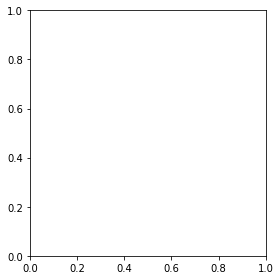

In [5]:

model.showNapari(imagedir, savedir, yolo_v2)
